In [2]:
import numpy as np
import urllib
import scipy.optimize
import random
import matplotlib.pyplot as plt
import sys
import collections
# from collections import defaultdict
import gzip
import string
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
import nltk
from nltk.tokenize import treebank
from nltk.corpus import opinion_lexicon
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestRegressor
import sys
# sys.path.append('C:\Python27\Lib\site-packages')
from textblob import TextBlob

ImportError: No module named textblob

In [2]:
def parseData(fname):
    print(fname)
    for l in open(fname, encoding="utf8"):
        yield eval(l)

In [3]:
data = list(parseData("C:/UCSD/CS_258/Assignment2/reviews.json"))

C:/UCSD/CS_258/Assignment2/reviews.json


In [4]:
print(data[0])
print (len(data))

{'review_id': 'NxL8SIC5yqOdnlXCg18IBg', 'user_id': 'KpkOkG6RIf4Ra25Lhhxf1A', 'business_id': '2aFiy99vNLklCx3T_tGS9A', 'stars': 5, 'date': '2011-10-10', 'text': "If you enjoy service by someone who is as competent as he is personable, I would recommend Corey Kaplan highly. The time he has spent here has been very productive and working with him educational and enjoyable. I hope not to need him again (though this is highly unlikely) but knowing he is there if I do is very nice. By the way, I'm not from El Centro, CA. but Scottsdale, AZ.", 'useful': 0, 'funny': 0, 'cool': 0, 'type': 'review'}
100001


In [5]:
dic_rating = {}
reviewers_dict = {}
for d in data:
    if not d['stars'] in dic_rating:
        dic_rating[d['stars']] = 1
    else:
        dic_rating[d['stars']]  += 1 
    
    if not d['user_id'] in reviewers_dict:
        reviewers_dict[d['user_id']] = 1
    else:
        reviewers_dict[d['user_id']] += 1

In [6]:
print("Number of Users are:")
print(len(reviewers_dict))

Number of Users are:
63517


In [7]:
print(dic_rating)
od = collections.OrderedDict(sorted(dic_rating.items()))
print(od)

{5: 37319, 4: 24724, 1: 15359, 3: 13822, 2: 8777}
OrderedDict([(1, 15359), (2, 8777), (3, 13822), (4, 24724), (5, 37319)])


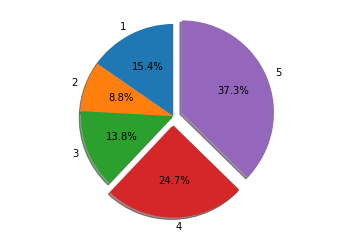

In [8]:
labels = '1', '2', '3', '4','5'
sizes = [15359, 8777, 13822, 24724,37319]
explode = (0, 0, 0, 0.1,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('rating_piechart.pdf')
plt.show()

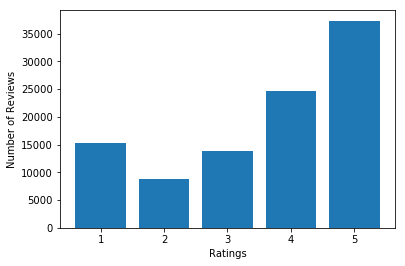

In [9]:
plt.bar(range(len(od)), od.values(), align='center')
plt.xticks(range(len(od)), od.keys())
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.savefig('rating_histogram.pdf')
plt.show()

In [10]:
sum_rating = 0 
for k in dic_rating:
    sum_rating += int(k) * dic_rating[k]
print(sum_rating)
avg = sum_rating/100001
print(sum_rating/100001)

359870
3.5986640133598664


In [11]:
error = 0 
for d in data:
    error += abs(d['stars'] - avg)

In [12]:
print ('MSE with the baseline is: ' + str(error/100001))

MSE with the baseline is: 1.2443693286883795


In [5]:
from collections import defaultdict
posW = opinion_lexicon.positive()
negW = opinion_lexicon.negative()
score = defaultdict(int)
for w in posW:
    score[w] = 1
for w in negW:
    score[w] = -1
    
    
def demo_liu_hu_lexicon(sentence):
    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [score[word.lower()] for word in tokenizer.tokenize(sentence) ]
    #print tokenized_sent
    return sum(tokenized_sent)/(1+1.0*len(tokenized_sent))
    #print tokenized_sent
    #tokenized_sent = [word for word in tokenized_sent if word not in stopwords.words('english')]
    '''
    #print len(tokenized_sent)
    for word in tokenized_sent:
        if word in posW:
            pos_words += 1
        elif word in negW:
            neg_words += 1

    if pos_words > neg_words:
        return 1
    elif pos_words < neg_words:
        return -1
    elif pos_words == neg_words:
        return 0
    '''

In [6]:
def sent_feat(text,rating):
    blob = TextBlob(text)
    sent=0.0
    for sentence in blob.sentences:
        sent+=sentence.sentiment.polarity

    if sent>0:
        r=5-rating
    else:
        r=rating
    return abs(sent)*r

In [7]:
x = 1500
print(demo_liu_hu_lexicon(data[0]['text']))
print(sent_feat(data[x]['text'], data[x]['stars']))

NameError: name 'data' is not defined

In [30]:
sent_nltk = defaultdict(float)
sent_tb = defaultdict(float)
sent_nltk_sum = defaultdict(float)
sent_tb_sum = defaultdict(float)

iter = 0
for d in data:
    iter += 1
    if iter % 10000 == 0:
        print (iter)
    #print iter
    sent_nltk_sum[(d['review_id'], d['user_id'])] = demo_liu_hu_lexicon(d['text'])
    sent_nltk[(d['review_id'], d['user_id'])] = demo_liu_hu_lexicon(d['text'])
    sent_tb[(d['review_id'], d['user_id'])] = sent_feat(d['text'], d['stars'])
    sent_tb_sum[(d['review_id'], d['user_id'])] = sent_feat(d['text'], d['stars'])

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
